## Задание 5. Модели линейной регрессии (часть II)

## Цель задания:
### 1. Провести диагностику множественной регрессионной модели
### 2. Выявить отклонения модели от требований теоремы Гаусса-Маркова
### 3. Идентифицировать наблюдения, оказывающие сильное влияние на модель
### 4. Построить регрессионную модель с фиктивными переменными
### 5. Оценить предсказательные возможности модели и предложить пути ее улучшения
### Цель исследования - выявить показатели, влияющие на темп роста ВВП

### 1.Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm ### получение регрессионной модели
import statsmodels.formula.api as smf ### получение регрессионной модели
import statsmodels.graphics.regressionplots as graph ### графический анализ регрессионной модели
import statsmodels.stats.api as test ### регрессионные тесты
import statsmodels.stats.outliers_influence ### регрессионные тесты
from patsy.contrasts import Treatment

In [2]:
import matplotlib.pyplot as plt # графическая библиотека

In [3]:
### %matplotlib inline

In [4]:
from __future__ import division #  деление с дробной частью (модуль из Python 3)

In [5]:
pd.set_option('display.max_colwidth',-1)# опция позволяет читать текстовые поля в "необрезанном виде"

### 2.Загрузка необходимых файлов

In [6]:
econ_model=pd.read_csv('/home/maxime/Documentos/Econometrics/econ_model.csv')
# загрузка данных, полученных в Задание 4

In [7]:
econ_model.head()

,Countryimf,Continent,BCA_NGDPD,GGXWDG_NGDP,NGDP_RPCH,NID_NGDP,PCPIPCH,PPPPC,NY.GNS.ICTR.ZS
0,AFG,Asia,7.253,7.823,2.164,18.533,4.384,7.557744,18.096194
1,AGO,Africa,-4.780,75.253,-2.580,27.215,30.694,8.865876,3.049233
2,ALB,Europe,-7.563,73.187,3.352,24.277,1.275,9.378468,14.540693
3,ARE,Asia,3.706,20.217,2.988,27.143,1.617,11.138237,23.757937
4,ARM,Asia,-2.258,51.862,0.261,19.727,-1.406,9.065648,12.403776


In [8]:
econ_model.index=econ_model.Countryimf

### 3. Построение модели множественной регрессии по данным Задания 4

### Регрессионную модель построим по анлогии с предыдущим заданием, при этом будем использовать символьную нотацию (форму записи) уравнения. Данная нотация преобразуется в математическое выражение с помощью библиотеки patsy и является аналогом символьной записи, применяемой в языке R.

In [9]:
results=smf.ols('NGDP_RPCH ~ NID_NGDP+PCPIPCH+PPPPC',data=econ_model).fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              NGDP_RPCH   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     25.44
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           3.00e-13
Time:                        22:33:23   Log-Likelihood:                -370.67
No. Observations:                 147   AIC:                             749.3
Df Residuals:                     143   BIC:                             761.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7908      2.051      2.823      0.0

### Проведем анализ вариации (ANOVA). Анализ построен на разложениее общей вариации процесса на две составляющие: вариация, объясненная моделью, и вариация остатков. В предыдущем задании мы уже проводили подобный анализ, считая самостоятельно указанные вариации. В данном задании воспользуемся возможностью statsmodels.

$\sum(y-\overline{y})^2=\sum(\hat{y}_x-\overline{y})^2-\sum(y-\hat{y}_x)^2$

In [11]:
ANOVA=pd.DataFrame()
ANOVA['Source']=['Model','Error','Total']
ANOVA['DF']=[results.df_model,results.df_resid,results.nobs-1]
ANOVA['MSE']= [results.mse_model,results.mse_resid,results.mse_total]
ANOVA['SumSq']=ANOVA['DF']*ANOVA['MSE']

In [12]:
ANOVA.head()

,Source,DF,MSE,SumSq
0,Model,3.0,237.298841,711.896523
1,Error,143.0,9.326836,1333.737533
2,Total,146.0,14.011192,2045.634056


### Добавим в исходный dataframe выравненные значения $\hat{Y}$ и остатки уравнения

In [13]:
econ_model['Fitted']=results.fittedvalues

In [14]:
econ_model['Resid']=results.resid

In [15]:
econ_model.head(10)

,Countryimf,Continent,BCA_NGDPD,GGXWDG_NGDP,NGDP_RPCH,NID_NGDP,PCPIPCH,PPPPC,NY.GNS.ICTR.ZS,Fitted,Resid
Countryimf,,,,,,,,,,,
AFG,AFG,Asia,7.253,7.823,2.164,18.533,4.384,7.557744,18.096194,3.089892,-0.925892
AGO,AGO,Africa,-4.780,75.253,-2.580,27.215,30.694,8.865876,3.049233,1.597006,-4.177006
ALB,ALB,Europe,-7.563,73.187,3.352,24.277,1.275,9.378468,14.540693,2.759596,0.592404
ARE,ARE,Asia,3.706,20.217,2.988,27.143,1.617,11.138237,23.757937,2.065932,0.922068
ARM,ARM,Asia,-2.258,51.862,0.261,19.727,-1.406,9.065648,12.403776,2.742551,-2.481551
ATG,ATG,Americas,0.151,86.215,5.348,24.343,-0.489,10.141553,16.623303,2.481419,2.866581
AUT,AUT,Europe,2.126,83.556,1.451,24.118,0.972,10.780359,20.732965,2.066466,-0.615466
AZE,AZE,Asia,-3.606,50.711,-3.100,24.930,12.562,9.764057,26.202151,1.989918,-5.089918
BDI,BDI,Africa,-13.085,48.420,-1.042,9.000,5.527,6.614949,22.649593,2.823912,-3.865912


### 4. Диагностика и анализ модели

### Во всех тестах $\alpha=0.05$

### 4.1. Прогнозные оценки, получаемые на основе регрессии

### Эконометрические модели служат не только для анализа влияния факторов на зависимую переменную, но и для целей прогнозирования. Данная часть задания посвящена построению интервальных оценок выравненных или прогнозных значений.

### Интервальная оценка строится как для среднего значения, предсказанного моделью, так и для точечной оценки. В библиотеке statsmodels используются следующие формулы:

### Точечная  оценка $\Delta=t(1-\frac{\alpha}{2},\nu=n-k)\sqrt{1+x_0(X^{'}X)^{-1}x_0^{'}}$
### Средняя оценка $\Delta=t(1-\frac{\alpha}{2},\nu=n-k)\sqrt{x_0(X^{'}X)^{-1}x_0^{'}}$

In [16]:
pred=results.get_prediction()
### инициализация процедуры расчета интервальных оценок выравненных значений

In [17]:
pd.concat([pred.summary_frame(),econ_model[['Countryimf','Continent','NGDP_RPCH','Fitted']]],axis=1).head(10)
### получение интервальных оценок

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,Countryimf,Continent,NGDP_RPCH,Fitted
Countryimf,,,,,,,,,,
AFG,3.089892,0.470026,2.160794,4.018989,-3.017979,9.197762,AFG,Asia,2.164,3.089892
AGO,1.597006,0.317609,0.969191,2.224821,-4.472344,7.666356,AGO,Africa,-2.580,1.597006
ALB,2.759596,0.255993,2.253577,3.265616,-3.298367,8.817559,ALB,Europe,3.352,2.759596
ARE,2.065932,0.456289,1.163990,2.967875,-4.037866,8.169731,ARE,Asia,2.988,2.065932
ARM,2.742551,0.291035,2.167264,3.317838,-3.321591,8.806692,ARM,Asia,0.261,2.742551
ATG,2.481419,0.305344,1.877848,3.084989,-3.585471,8.548309,ATG,Americas,5.348,2.481419
AUT,2.066466,0.394341,1.286975,2.845956,-4.020443,8.153375,AUT,Europe,1.451,2.066466
AZE,1.989918,0.271587,1.453074,2.526762,-4.070698,8.050533,AZE,Asia,-3.100,1.989918
BDI,2.823912,0.722232,1.396282,4.251542,-3.379393,9.027216,BDI,Africa,-1.042,2.823912


### Получение интервальной оценки на примере наблюдения с индексом 6 (Австрия)

In [18]:
n=econ_model.shape[0] ### число наблюдений
k=4 # число параметров, включая свободный член

In [19]:
X_m=sm.add_constant(econ_model.iloc[:,[5,6,7]],prepend=True)

In [20]:
forecast=np.array([1,econ_model.iloc[6,5],econ_model.iloc[6,6],econ_model.iloc[6,7]])
### массив со значением независимых переменных Х, используемый 
### для получения выравненного (прогнозного) значения Y

In [21]:
forecast

array([  1.        ,  24.118     ,   0.972     ,  10.78035872])

### Матрица  $(X^{'}X)^{-1}$ 

In [22]:
np.linalg.inv(np.dot(X_m.T,X_m))
### расчет с использованием numpy

array([[  4.51096954e-01,  -1.38947580e-03,  -2.58073672e-04,
         -4.38012239e-02],
       [ -1.38947580e-03,   7.46693472e-05,   6.21161992e-07,
         -4.46853985e-05],
       [ -2.58073672e-04,   6.21161992e-07,   4.90445662e-06,
          2.18073092e-05],
       [ -4.38012239e-02,  -4.46853985e-05,   2.18073092e-05,
          4.79105865e-03]])

In [23]:
results.normalized_cov_params
### использование функции statsmodels

,Intercept,NID_NGDP,PCPIPCH,PPPPC
Intercept,0.451097,-1.389476e-03,-2.580737e-04,-0.043801
NID_NGDP,-0.001389,7.466935e-05,6.211620e-07,-0.000045
PCPIPCH,-0.000258,6.211620e-07,4.904457e-06,0.000022
PPPPC,-0.043801,-4.468540e-05,2.180731e-05,0.004791


### Расчет стандартного отклонения для точечной и средней оценок

In [24]:
sigma_point=np.sqrt(results.mse_resid)*np.sqrt(1+np.dot(np.dot(forecast,np.linalg.inv(np.dot(X_m.T,X_m))),forecast.T))

In [25]:
sigma_mean=np.sqrt(results.mse_resid)*np.sqrt(np.dot(np.dot(forecast,np.linalg.inv(np.dot(X_m.T,X_m))),forecast.T))

In [26]:
sigma_point

3.0793409311380442

In [27]:
sigma_mean

0.39434081074044952

### Интервалы для точечной и средней оценок

In [28]:
delta_mean=stats.t.ppf(0.975,n-k)*sigma_mean

In [29]:
delta_point=stats.t.ppf(0.975,n-k)*sigma_point

In [30]:
econ_model.iloc[6,9]-delta_point,econ_model.iloc[6,9]+delta_point

(-4.020443417874878, 8.1533749687420887)

In [31]:
econ_model.iloc[6,9]-delta_mean,econ_model.iloc[6,9]+delta_mean

(1.2869753715225098, 2.845956179344701)

### 4.2. Графический анализ остатков уравнения регрессии

### Графический анализ остатков позволяет визуализировать отклонения модели от предпосылок теоремы Маркова-Гаусса и провести первичную диагностику модели. Для этих целей используются разные виды графиков. В задании мы остановимся на двух из них.

### График 'Выравненные значения vs Остатки'. Цель построения графика - проанализировать зависимость остатков от выравненных значений переменной Y. С помощью графика можно выявить признаки автокорреляции и гетеоскедастичности.

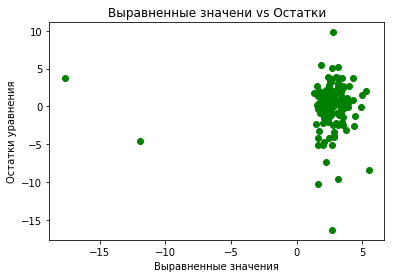

In [32]:
plt.scatter(x=econ_model['Fitted'],y=econ_model['Resid'], c='green')
plt.title(u'Выравненные значени vs Остатки')
plt.ylabel(u'Остатки уравнения')
plt.xlabel(u'Выравненные значения')
plt.show()
plt.gcf().clear()

### Вывод: Построенный график не позволяет сделать выводов о поведении остатков. Причина это заключается в присутствии нескольких выбросов, существенно искажающих картину. Целесообразно рассмотреть отдельно случаи экстремальных значений остатков.

### Проверка нормальности остатков распределения

In [33]:
sm.qqplot(results.resid)
plt.gcf().clear()

### Вывод: Визуальный анализ QQ-plot не позволяет сделать вывод о нормальности рапсределения остатков, что подтверждается тестами, приведенными в результатх модели (например, Jarque-Bera тест ). Само по себе отсутствие нормальности рапсределения остатков не является препятствием для использования модели, однако стоит обратить внимание на экстремальные значения.

### 4.3. Выявление наблюдений, сильно влияющих на параметры модели

### Цель данного этапа анализа заключается в идентификации наблюдений, присутствие которых может существенно изменить или  исказить харктер взаимосвязи. Анализ построен на том, что для каждого наблюдения сравниваются две регресионные модели - с данным наблюдением и без данного наблюдения. Наиболее популярным критерием является Cook's distance. Чем больше его значение. тем влиятельнее наблюдение.

In [34]:
infl=results.get_influence()
### создание объекта, содержащего информацию о степени влияния каждого наблюдения на модель

In [35]:
pd.concat([infl.summary_frame(),
           econ_model[['Countryimf','Continent','NGDP_RPCH','Fitted']]],axis=1).nlargest(10,'cooks_d')

,dfb_Intercept,dfb_NID_NGDP,dfb_PCPIPCH,dfb_PPPPC,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid,Countryimf,Continent,NGDP_RPCH,Fitted
Countryimf,,,,,,,,,,,,,,
SSD,0.017562,-0.078231,3.013891,-0.036944,2.302961,3.073568,3.035102,0.670249,2.128867,2.155848,SSD,Africa,-13.933,-17.666438
YEM,-1.012784,1.205969,0.420692,0.585579,0.450871,-1.506199,-1.342939,0.056503,-5.487716,-6.154853,YEM,Asia,-13.621,2.658051
VEN,0.175826,0.127033,-1.177865,-0.213984,0.356369,-1.203157,-1.193933,0.310252,-1.780195,-1.793949,VEN,Americas,-16.456,-11.940771
COG,0.103988,-1.005064,0.016320,0.182693,0.258454,-1.044147,-1.016768,0.110179,-2.889507,-2.967314,COG,Africa,-2.829,5.495194
SUR,0.281083,-0.890784,-0.329671,-0.025126,0.225629,-0.969382,-0.950008,0.119985,-2.572811,-2.625280,SUR,Americas,-5.139,2.231891
TCD,-0.426436,0.188540,0.124273,0.344271,0.057073,-0.493794,-0.477798,0.022208,-3.170355,-3.276497,TCD,Africa,-6.431,3.143107
GNQ,0.185396,0.255193,0.016632,-0.312854,0.055515,-0.489409,-0.471231,0.019185,-3.369368,-3.499343,GNQ,Africa,-8.576,1.614821
IRN,-0.150188,0.264230,0.033862,0.105369,0.037932,0.403092,0.389521,0.014378,3.225009,3.337371,IRN,Asia,12.518,2.739928
BDI,-0.295037,0.157047,0.049237,0.240609,0.025137,-0.317876,-0.317094,0.055927,-1.302812,-1.306023,BDI,Africa,-1.042,2.823912


### Графический анализ влияния наблюдений 

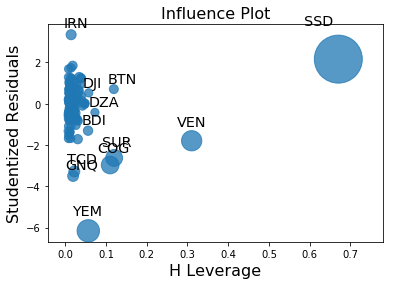

In [36]:
sm.graphics.influence_plot(results)


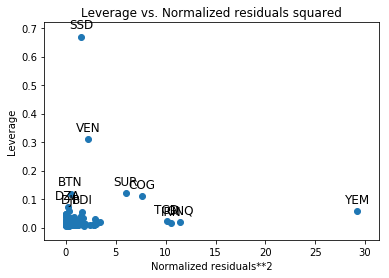

In [37]:
graph.plot_leverage_resid2(results)


### Анализ влияния наблюдений строится на основе диагональных элементов матрицы проекции, имеющей вид $H=X(X^{'}X)^{-1}X^{'}$

### Матрица проекции служит для пребразования исходной перменной $Y$ в пространство перменной $\hat{Y}$ (в англоязычной литературе называется hat matrix):  $\hat{Y}=HY$

In [38]:
infl.hat_matrix_diag[0:10]
### расчет матрицы проекции в statsmodels

array([ 0.02368699,  0.0108156 ,  0.00702623,  0.02232263,  0.00908147,
        0.00999639,  0.01667282,  0.00790831,  0.05592667,  0.01585668])

In [39]:
np.diagonal(np.dot(np.dot(X_m,np.linalg.inv(np.dot(X_m.T,X_m))),X_m.T))[0:10]
### расчет матрицы проекции c помощью numpy

array([ 0.02368699,  0.0108156 ,  0.00702623,  0.02232263,  0.00908147,
        0.00999639,  0.01667282,  0.00790831,  0.05592667,  0.01585668])

### Вывод: Из модели целесообразно удалить Южный Судан, Йемен и Венесуэлу (надо отметить, что выбор всегда остается за исследователем)

### Построим модель, исключив "влиятельные"  наблюдения

In [40]:
results_1=smf.ols('NGDP_RPCH ~ NID_NGDP+PCPIPCH+PPPPC',data=econ_model.drop(['SSD','YEM','VEN'],axis=0)).fit()

In [41]:
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:              NGDP_RPCH   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     8.249
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           4.30e-05
Time:                        22:33:26   Log-Likelihood:                -342.12
No. Observations:                 144   AIC:                             692.2
Df Residuals:                     140   BIC:                             704.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5914      1.869      4.597      0.0

### Вывод: Присутствие указанных выше стран серьезно сказывается на параметрах модели. В частности, после удаления данных стран коэффицент детерминации снизился вдвое, также изменились и значения коэффициентов регрессии. 

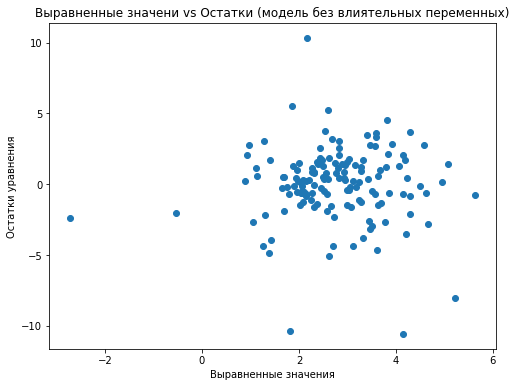

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x=results_1.fittedvalues,y=results_1.resid)
plt.title(u'Выравненные значени vs Остатки (модель без влиятельных переменных)')
plt.ylabel(u'Остатки уравнения')
plt.xlabel(u'Выравненные значения')
plt.show()
plt.gcf().clear()

### После удаления сильно влияющих наблюдений график "Выравненные значени vs Остатки" поддается интерпретации.  Из данного графика мы можем сделать предварительный вывод об отсутствии каких-то явных тенденций в поведении остатков. Однако окончательный вывод можно сделать только на основании формальных критериев, что является предметом следующих этапов анализа.

### 4.4. Автокорреляция

### Наличие автокорреляции в остатках может говорить о том, что модель систематически недоучитывает влияние других факторов, невключенных в модель. Для выявления наличия авткорреляции в остатках уравнения регрессии воспользуемся критериями Дарбина-Уотсона и Льюнга-Бокса

### Коэффициент автокорреляции Дарбина-Уотсона $d=\frac{\sum_{t=2}^{T}(e_t-e_{t-1})^2}{\sum_{t=1}^{T}e_t^2}$

In [43]:
np.sum((np.array(results_1.resid[:-1])-np.array(results_1.resid[1:]))**2)/np.sum(np.array(results_1.resid)**2)
### расчет коэффиицента с помощью numpy

1.9582338277672107

### Вывод: значение коэффициента близко к 2, автокорреляция отсутсвует или незначима.

### Тест Льюнга-Бокса основан на расчете коэффициентов автокорреляции остатков, рассчитываемых для разного количества лагов (смещений). Таким образом данный тест позволяет идентифицировать автокорреляцию остатков более высоких порядков.

In [44]:
test.acorr_ljungbox(results_1.resid)[0][0:5]
### значение статистики Льюнга-Бокса

array([ 0.02619656,  2.63811212,  6.69249946,  7.75320757,  7.78854223])

In [45]:
test.acorr_ljungbox(results_1.resid)[1][0:5]
###  pvalue статистики Льюнга-Бокса

array([ 0.87142122,  0.26738758,  0.08237223,  0.10104849,  0.16828098])

### Вывод: Pvalue статистики Льюнга-Бокса для первых 5 лагов показывает,  что автокорреляция отсутствует или незначима ($pvalue<\alpha$)

### 4.5. Гетероскедастичность

### Гетероскедастичность означает остутствие постоянсво дисперсии остатков. Как и автокорреляция, гетероскедастичность говорит о том, что в модели может отсутствовать важная информация (дополнительные факторы, объясняющие поведение переменной Y).  Для проверки наличия гетероскедастичности воспользуемся тестом Бреуша-Пагана. Тест основан на построении и проверки значимости дополнительного уравнения, где в качестве зависимой переменной берется квадрат ошибки.

In [46]:
lm,lm_value,fvalue,f_pvalue=test.het_breushpagan(results_1.resid,results_1.model.exog)

In [47]:
print('lm %.4f,lm_pvalue %.4f,fvalue %.4f,f_pvalue %.4f'%(lm,lm_value,fvalue,f_pvalue))

lm 1.2257,lm_pvalue 0.7468,fvalue 0.4006,f_pvalue 0.7528


### Вывод: Для проверки гипотезы используются $\chi^2$ и F-критерий. Значения p-value обоих критериев говорят об отсутствии гетероскедастичности

### 4.6. Мультиколлинеарность

### Мультколлинеарность играет большую роль в регрессионном анализе.  Следствием мульколлинеарности в модели является получение неустойчивых оценок коэффициентов (слишком большая ошибка). Выявление мультиколлинеарности осуществляется несколькими способами. В частности, с помощью показателя VIF (Variation Inflation Factor). Значение VIF больше 10 говорит о возможной проблеме мультиколлинеарности.

### Математически мультколлинеарность проявляется в том, что определитель матрицы  $(X^{'}X)^{-1}$  близок к нулю, т.е. матрица оказывается вырожденной. Однако это не всегда является однозначным свидетельством мультиколлинеарности.  Например, в рассматриваемом случае определитель матрицы имеет значение близкое к нулю, но VIF ни по одной из неазависимых переменных Х не подтверждает наличия мультиколлинеарности.

In [48]:
 np.linalg.det(np.linalg.inv(np.dot(X_m.T,X_m)))

1.1606693328260681e-14

In [49]:
results_1.model.exog[0:10]
### матрица независимых переменных Х (в терминологии statsmodels экзогенных переменных)

array([[  1.        ,  18.533     ,   4.384     ,   7.55774388],
       [  1.        ,  27.215     ,  30.694     ,   8.86587572],
       [  1.        ,  24.277     ,   1.275     ,   9.37846809],
       [  1.        ,  27.143     ,   1.617     ,  11.13823714],
       [  1.        ,  19.727     ,  -1.406     ,   9.0656483 ],
       [  1.        ,  24.343     ,  -0.489     ,  10.1415531 ],
       [  1.        ,  24.118     ,   0.972     ,  10.78035872],
       [  1.        ,  24.93      ,  12.562     ,   9.76405691],
       [  1.        ,   9.        ,   5.527     ,   6.61494944],
       [  1.        ,  23.952     ,   1.77      ,  10.71741303]])

In [50]:
[statsmodels.stats.outliers_influence.variance_inflation_factor(results_1.model.exog,i) 
 for i in range(1,results_1.model.exog[0:10].shape[1])]
### расчет VIF для каждой независимой переменной X

[1.0648551676512572, 1.1563937462593983, 1.1068536502108135]

### Построим кореляционную матрицу для независимых переменных X. Наличие мультиколлинеарности можно обнаружить по значению коэффициента корреляции. На практике используется эмпирическое правило - если значение коэффициента корреляции больше 0.8, одну из переменных следует удалить из модели.

In [51]:
econ_model[['NID_NGDP','PCPIPCH','PPPPC']].corr()

,NID_NGDP,PCPIPCH,PPPPC
NID_NGDP,1.000000,-0.043652,0.080185
PCPIPCH,-0.043652,1.000000,-0.145170
PPPPC,0.080185,-0.145170,1.000000


### 4.7. Линейность модели

### Для проверки предпосылки (гипотезы) линейности связей в модели используется несколько тестов. Остановимся на тесте Рамсея (RESET). Данный тест предполагает построение дополнительной регрессионной модели. В данной модели в качестве независимых переменных используются степени различных порядков выравненных значений $\hat{Y}$. Если коэффициенты при этих переменных статистически незначимы, линейную спецификацию модели можно считать приемлемой.  

In [52]:
statsmodels.stats.outliers_influence.reset_ramsey(results_1,degree=2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 7.75615938]]), p=0.00610002847103, df_denom=139, df_num=1>

### P-value меньше уровня значимости $\alpha$, следовательно гипотеза о линейности связи в модели не принимается, т.е. целесообразно включить в модель более высокие степени переменных X (квадрат, куб и т.д.)

### 4.8. Предсказательные свойства модели и ее практическая применимость

### На предыдущих этапах была получена и проанализирована модель, описывающая влияние рзличных факторов на экономический рост. Модель объясняет только 15% вариации зависимой переменной Y (с учетом того, что три страны были исключены их модели). Попробуем рассмотреть причины низкой предсказательной способности модели и  наметить пути ее улучшения.

### Одной из причин низкой предсказательной способности модели является то, что она дает систематическую ошибку для тех стран, у которых имеет место отрицательный рост.   

In [53]:
econ_model[econ_model['NGDP_RPCH']<0]

,Countryimf,Continent,BCA_NGDPD,GGXWDG_NGDP,NGDP_RPCH,NID_NGDP,PCPIPCH,PPPPC,NY.GNS.ICTR.ZS,Fitted,Resid
Countryimf,,,,,,,,,,,
AGO,AGO,Africa,-4.780,75.253,-2.580,27.215,30.694,8.865876,3.049233,1.597006,-4.177006
AZE,AZE,Asia,-3.606,50.711,-3.100,24.930,12.562,9.764057,26.202151,1.989918,-5.089918
BDI,BDI,Africa,-13.085,48.420,-1.042,9.000,5.527,6.614949,22.649593,2.823912,-3.865912
BHS,BHS,Americas,-7.329,50.482,-1.690,25.554,-0.347,10.363201,23.934501,2.448565,-4.138565
BLR,BLR,Europe,-3.499,53.482,-2.526,26.478,11.829,9.803365,12.177290,2.120058,-4.646058
BLZ,BLZ,Americas,-8.980,95.867,-0.487,22.261,0.663,9.028600,26.490065,2.825513,-3.312513
BRA,BRA,Americas,-1.313,78.430,-3.469,15.381,8.740,9.636493,15.311961,1.590838,-5.059838
BRN,BRN,Asia,12.900,3.005,-2.465,34.620,-0.739,11.259356,56.412016,2.663343,-5.128343
COG,COG,Africa,-73.649,128.654,-2.829,60.857,3.191,8.856301,11.043295,5.495194,-8.324194


### Построим модель только для стран с положительным ростом. В данной модели показатель инфляции оказывается незначимым.

In [54]:
results_2=smf.ols('NGDP_RPCH ~ NID_NGDP+PCPIPCH+PPPPC',data=econ_model[econ_model['NGDP_RPCH']>=0]).fit()

In [55]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:              NGDP_RPCH   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     7.925
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           7.05e-05
Time:                        22:33:28   Log-Likelihood:                -260.60
No. Observations:                 128   AIC:                             529.2
Df Residuals:                     124   BIC:                             540.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8517      1.564      4.382      0.0

### Для улучшения модели можно предложить следующие варианты:
###  - построение не одной  модели, а нескольких моделей для разных групп стран
###  - включение в модель других экономических показателей
###  - включение в модель степеней независимых переменных ($X^2$)
###  -  включение в модель качественных переменных

### 5. Включение фиктивных переменных в регрессионную модель

### Построим простую регрессионную модель, включив в нее качестенную переменную, показывающую принадлежность страны к определенному континенту. Для этой целей применем процедуру кодирования или бинаризации к данной перменной. Качественная переменная превращаетя в, так называемые, фиктивные переменные  (dummy variables).

In [56]:
pd.get_dummies(econ_model['Continent']).head()
### преобразование качественных переменных можно реализовать с помощью pandas

,Africa,Americas,Asia,Europe,Oceania
Countryimf,,,,,
AFG,0,0,1,0,0
AGO,1,0,0,0,0
ALB,0,0,0,1,0
ARE,0,0,1,0,0
ARM,0,0,1,0,0


### Значение 1 фиктивной переменной означает принадлежность к тому или иному континенту. Для создания фиктивных переменных с целью их включения  в регрессионную модель необходимо выбрать базовый уровень качественной переменной (или референтную группу). Таким образом, при n различных значениях качественной переменной в модели появится n-1 фиктивных переменных. Это делается с помощью команд библиотеки patsy. В рассматриваемом примере базовым уровнем выступает европейский континент.

In [57]:
results_3=smf.ols("NGDP_RPCH ~ C(Continent,Treatment('Europe'))+PCPIPCH",data=econ_model.drop(['SSD','YEM','VEN'],axis=0)).fit()

In [58]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:              NGDP_RPCH   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.859
Date:                Thu, 13 Dec 2018   Prob (F-statistic):             0.0173
Time:                        22:33:28   Log-Likelihood:                -346.75
No. Observations:                 144   AIC:                             705.5
Df Residuals:                     138   BIC:                             723.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Интерпретация модели.  Роль фиктивной перменной в данном случае сводится к новой интерпретации свободного члена регрессионного уравнения. В рассматриваемой модели базой являтся Европа, таким образом свободный член показвает, каким в среднем должен быть рост в Европе при нулевой инфляции. Значение коэффициентов регрессии при фиктивных переменных показывает, как изменится экономический рост при "переходе" от одного континента к другому. Например, при прочих равных (т.е. без учета эффекта инфляции) рост в азиатских странах составит исходя из модели 2.6%+1.4% = 4%. Таким образом, мы оцениваем влияние принадлежности к тому или иному континенту на рост.

### Регрессионное уравнение только для Европы

In [59]:
results_4=smf.ols("NGDP_RPCH ~ PCPIPCH",data=econ_model[econ_model.Continent=='Europe']).fit()

In [60]:
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:              NGDP_RPCH   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     21.64
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           7.18e-05
Time:                        22:33:28   Log-Likelihood:                -49.734
No. Observations:                  30   AIC:                             103.5
Df Residuals:                      28   BIC:                             106.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8091      0.252     11.131      0.0

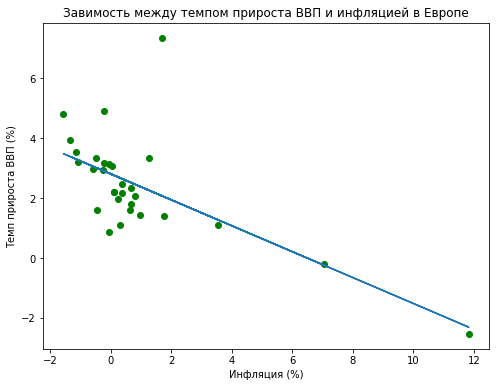

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(econ_model[econ_model.Continent=='Europe']['PCPIPCH'],econ_model[econ_model.Continent=='Europe']['NGDP_RPCH'], c='green')
plt.plot(econ_model[econ_model.Continent=='Europe']['PCPIPCH'],results_4.fittedvalues)
plt.title(u'Завимость между темпом прироста ВВП и инфляцией в Европе')
plt.ylabel(u'Темп прироста ВВП (%)')
plt.xlabel(u'Инфляция (%)')
plt.show()
plt.gcf().clear()

### Регрессионное уравнение только с фиктивными переменными

In [62]:
results_5=smf.ols("NGDP_RPCH ~ C(Continent,Treatment('Europe'))",data=econ_model.drop(['SSD','YEM','VEN'],axis=0)).fit()

In [63]:
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:              NGDP_RPCH   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.604
Date:                Thu, 13 Dec 2018   Prob (F-statistic):              0.177
Time:                        22:33:29   Log-Likelihood:                -350.59
No. Observations:                 144   AIC:                             711.2
Df Residuals:                     139   BIC:                             726.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [64]:
results_3.model.exog[0]
### пример наблюдения с учетом фиктивных переменных

array([ 1.   ,  0.   ,  0.   ,  1.   ,  0.   ,  4.384])

## Задание

### Для выполнения данного задания необходимо загрузить данные, подготовленные в Задании 4    
### 1. Провести диагностику и анализ модели, используя рассмотренные методы и критерии
### 2. Построить  модель  линейной регрессии с фиктивными переменными (в примере разобрано несколько моделей, достаточно построить только общую модель).  Для перменной Continent рассмотреть разные референтные группы.
### 3. Сформулировать основные выводы, указать недостатки модели и наметить возможные пути ее улучшения